## Ant Colony Optimizer

In [ ]:
!pip install ipdb
import ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00


In [ ]:
%pdb on

Automatic pdb calling has been turned ON


In [ ]:
import numpy as np
from math import pow
import random

def generateDistances(n_cities):
  cities = np.random.randint(3,51, size=(n_cities,n_cities))
  cities = (cities + cities.T)//2
  np.fill_diagonal(cities, 0)
  return cities
def generatePheromones(n_cities):
  pheromones = np.ones((n_cities,n_cities), dtype=float)
  return pheromones




run on cities with diff # of ants, 1, 5, 10, 20
number of ants wont change in a run
a run consists of 50 iterations
each iteration is a full loop from start and back
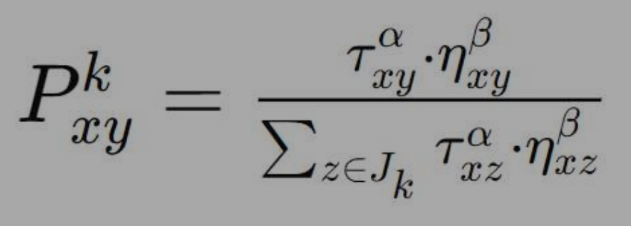

In [ ]:
def update_pheromone(all_paths, cities,pheromones):
  #visited_cities was appended with the order of visiting so now we have a full path
  pher = np.ones_like(pheromones, dtype=float)
  for path, cost in all_paths:
    for i in range(len(path)-1):
      a= path[i]
      b= path[i+1]
      pher[a][b] += 2/cost
      pher[b][a] += 2/cost

  pheromones = (0.6)*pheromones + pher
  return pheromones

In [ ]:
def calc_probability(current_city, cities, pheromones, visited_cities, j, alpha = 1, beta =2):
  if j in visited_cities or j == current_city:
    return 0.0
  numerator = (pheromones[current_city][j]**alpha) * ((1 / (cities[current_city][j]))** beta)
  denominator = sum([(pheromones[current_city][i]**alpha) * ((1 / (cities[current_city][i]))** beta) for i in range(len(cities)) if i not in visited_cities and i != current_city])
  return numerator / denominator if denominator != 0 else 0.0


In [ ]:
def move(current_city, cities, pheromones, visited_cities):
    probabilities = []
    city_indices = []

    for j in range(len(cities)):
        if j not in visited_cities and j != current_city:
            prob = calc_probability(current_city, cities, pheromones, visited_cities, j)
            probabilities.append(prob)
            city_indices.append(j)

    if not probabilities or sum(probabilities) == 0:
        return random.choice([i for i in range(len(cities)) if i not in visited_cities])

    probabilities = [p / sum(probabilities) for p in probabilities]
    return np.random.choice(city_indices, p=probabilities)

In [ ]:
def start_end(cities, n_ant, pheromones):
    all_paths = []
    n_cities = len(cities)
    for _ in range(n_ant):
        visited_cities = [0]
        current_city = 0
        total_cost = 0
        while len(visited_cities) < n_cities:
            next_city = move(current_city, cities, pheromones, visited_cities)
            total_cost += cities[current_city][next_city]
            visited_cities.append(next_city)
            current_city = next_city
        total_cost += cities[current_city][0]
        visited_cities.append(0)
        all_paths.append((visited_cities, total_cost))
    return all_paths

In [ ]:
def run_AOC(n_cities, n_ant, distances=None, iteration_callback=None):
    if distances is None:
        distances = generateDistances(n_cities)
    pheromones = generatePheromones(n_cities)
    best_cost = float('inf')
    best_path = None

    for i in range(50):
        all_paths = start_end(distances, n_ant, pheromones)
        for path, cost in all_paths:
            if cost < best_cost:
                best_cost = cost
                best_path = path
        pheromones = update_pheromone(all_paths, distances, pheromones)
        # print(f"Iteration {i+1}: Best Cost = {best_cost}")
        if iteration_callback is not None:
            iteration_callback(i + 1, pheromones, best_path, best_cost)

    return best_path, best_cost, distances

In [ ]:
def run():
    for n_cities in [10,20]:
         distances = generateDistances(n_cities)
         for n_ant in [1,5,10,20]:
            print (f"{n_ant} ants on {n_cities} cities")
            best_path, best_cost,_ = run_AOC(n_cities, n_ant,distances)
            best_path = [int(i) for i in best_path]
            print(f"best path: {best_path}")
            print(f"best cost: {best_cost}")

run()

1 ants on 10 cities
best path: [0, 2, 6, 4, 1, 3, 8, 9, 7, 5, 0]
best cost: 169
5 ants on 10 cities
best path: [0, 5, 3, 6, 1, 4, 7, 9, 8, 2, 0]
best cost: 161
10 ants on 10 cities
best path: [0, 2, 6, 1, 4, 7, 9, 8, 3, 5, 0]
best cost: 155
20 ants on 10 cities
best path: [0, 5, 3, 8, 9, 7, 1, 4, 6, 2, 0]
best cost: 152
1 ants on 20 cities
best path: [0, 17, 3, 13, 4, 12, 16, 5, 19, 14, 6, 15, 7, 11, 1, 8, 10, 18, 9, 2, 0]
best cost: 277
5 ants on 20 cities
best path: [0, 12, 16, 5, 19, 14, 3, 17, 6, 15, 9, 4, 13, 10, 11, 1, 18, 2, 7, 8, 0]
best cost: 273
10 ants on 20 cities
best path: [0, 8, 1, 11, 18, 17, 6, 5, 2, 14, 19, 12, 16, 3, 13, 4, 7, 9, 15, 10, 0]
best cost: 254
20 ants on 20 cities
best path: [0, 7, 3, 14, 19, 12, 16, 5, 2, 13, 4, 11, 8, 1, 10, 6, 15, 9, 18, 17, 0]
best cost: 242


evaporation rate = 0.4
pheromone deposited = Q/d where Q is a constant = 2 and d is the path length
alpha = 1 and beta = 2, these determines the "importance" of distance and pheromones in calculatin gthe probability

In [ ]:
from google.colab import files



 Pheromone Matrix at Iteration 10


To City,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
From City,,,,,,,,,,,,,,,,,,,,
0,2.491,2.503,2.504,2.501,2.502,2.500,2.537,2.497,2.499,2.521,2.521,2.670,2.520,2.517,2.496,2.527,2.508,2.516,2.524,2.503
1,2.503,2.491,2.501,2.506,2.496,2.538,2.539,2.506,2.494,2.524,2.515,2.494,2.584,2.533,2.509,2.560,2.560,2.503,2.494,2.509
2,2.504,2.501,2.491,2.495,2.503,2.518,2.505,2.497,2.530,2.519,2.516,2.607,2.549,2.515,2.514,2.517,2.562,2.527,2.497,2.493
3,2.501,2.506,2.495,2.491,2.505,2.502,2.510,2.596,2.507,2.531,2.584,2.503,2.495,2.536,2.493,2.503,2.513,2.576,2.501,2.512
4,2.502,2.496,2.503,2.505,2.491,2.493,2.510,2.498,2.529,2.532,2.551,2.542,2.500,2.526,2.493,2.599,2.522,2.532,2.499,2.536
5,2.500,2.538,2.518,2.502,2.493,2.491,2.495,2.676,2.493,2.496,2.528,2.492,2.556,2.547,2.530,2.500,2.502,2.503,2.496,2.503
6,2.537,2.539,2.505,2.510,2.510,2.495,2.491,2.500,2.527,2.531,2.522,2.556,2.504,2.530,2.509,2.520,2.546,2.513,2.505,2.510
7,2.497,2.506,2.497,2.596,2.498,2.676,2.500,2.491,2.505,2.499,2.501,2.494,2.502,2.510,2.496,2.533,2.497,2.520,2.503,2.540
8,2.499,2.494,2.530,2.507,2.529,2.493,2.527,2.505,2.491,2.516,2.504,2.517,2.495,2.522,2.683,2.502,2.501,2.533,2.502,2.509


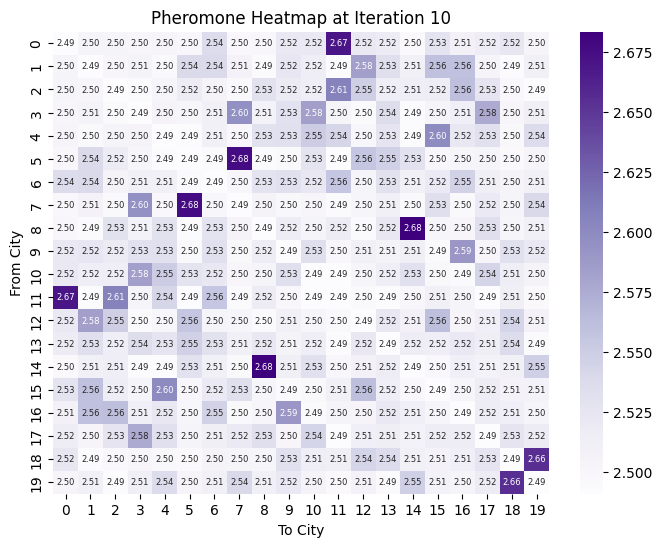

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Best Path at Iteration 10: [0, 11, 15, 1, 14, 8, 4, 10, 17, 3, 13, 12, 18, 19, 7, 5, 2, 16, 6, 9, 0]
 Total Cost: 289

 Pheromone Matrix at Iteration 20


To City,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
From City,,,,,,,,,,,,,,,,,,,,
0,2.500,2.514,2.515,2.509,2.508,2.513,2.546,2.510,2.508,2.515,2.533,2.657,2.543,2.525,2.510,2.516,2.536,2.529,2.541,2.511
1,2.514,2.500,2.532,2.509,2.511,2.556,2.543,2.511,2.501,2.515,2.510,2.502,2.606,2.546,2.517,2.569,2.548,2.517,2.518,2.515
2,2.515,2.532,2.500,2.501,2.517,2.528,2.516,2.500,2.528,2.520,2.528,2.617,2.539,2.525,2.511,2.522,2.584,2.541,2.513,2.503
3,2.509,2.509,2.501,2.500,2.513,2.529,2.512,2.592,2.512,2.524,2.580,2.517,2.516,2.546,2.502,2.526,2.528,2.590,2.506,2.529
4,2.508,2.511,2.517,2.513,2.500,2.511,2.531,2.508,2.524,2.541,2.578,2.551,2.511,2.518,2.511,2.599,2.535,2.536,2.523,2.515
5,2.513,2.556,2.528,2.529,2.511,2.500,2.505,2.685,2.513,2.533,2.518,2.508,2.539,2.531,2.526,2.504,2.507,2.517,2.507,2.511
6,2.546,2.543,2.516,2.512,2.531,2.505,2.500,2.502,2.562,2.538,2.503,2.570,2.510,2.533,2.515,2.525,2.576,2.514,2.520,2.520
7,2.510,2.511,2.500,2.592,2.508,2.685,2.502,2.500,2.502,2.502,2.506,2.508,2.504,2.504,2.503,2.569,2.505,2.548,2.511,2.572
8,2.508,2.501,2.528,2.512,2.524,2.513,2.562,2.502,2.500,2.532,2.518,2.519,2.504,2.539,2.692,2.513,2.508,2.535,2.518,2.512


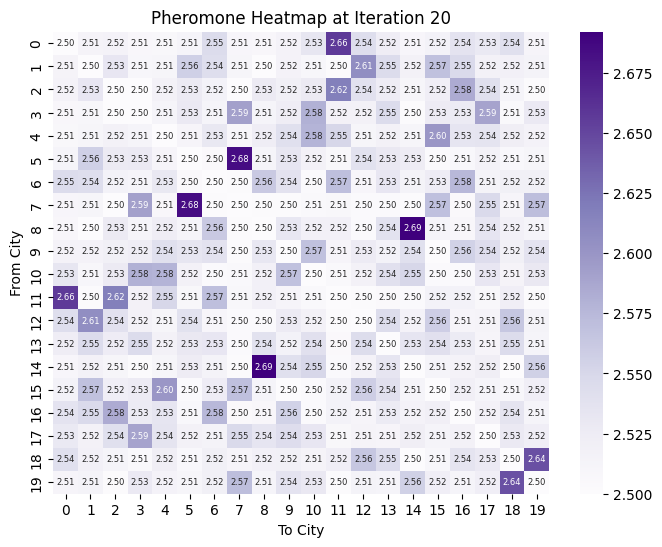

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Best Path at Iteration 20: [0, 11, 15, 1, 14, 8, 4, 10, 17, 3, 13, 12, 18, 19, 7, 5, 2, 16, 6, 9, 0]
 Total Cost: 289

 Pheromone Matrix at Iteration 30


To City,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
From City,,,,,,,,,,,,,,,,,,,,
0,2.500,2.509,2.520,2.508,2.508,2.519,2.534,2.513,2.510,2.531,2.536,2.682,2.532,2.521,2.508,2.511,2.530,2.533,2.529,2.507
1,2.509,2.500,2.518,2.517,2.512,2.535,2.537,2.503,2.501,2.518,2.520,2.501,2.582,2.577,2.526,2.574,2.565,2.505,2.519,2.522
2,2.520,2.518,2.500,2.513,2.519,2.523,2.507,2.514,2.527,2.544,2.540,2.599,2.547,2.520,2.508,2.512,2.582,2.542,2.505,2.501
3,2.508,2.517,2.513,2.500,2.518,2.519,2.530,2.562,2.502,2.522,2.604,2.508,2.511,2.527,2.519,2.540,2.512,2.588,2.522,2.522
4,2.508,2.512,2.519,2.518,2.500,2.507,2.522,2.500,2.509,2.560,2.576,2.556,2.505,2.526,2.517,2.594,2.538,2.530,2.522,2.522
5,2.519,2.535,2.523,2.519,2.507,2.500,2.519,2.702,2.515,2.514,2.529,2.514,2.543,2.541,2.531,2.500,2.506,2.505,2.506,2.513
6,2.534,2.537,2.507,2.530,2.522,2.519,2.500,2.501,2.543,2.529,2.521,2.574,2.520,2.549,2.535,2.505,2.562,2.519,2.523,2.510
7,2.513,2.503,2.514,2.562,2.500,2.702,2.501,2.500,2.503,2.503,2.506,2.504,2.513,2.516,2.503,2.555,2.509,2.565,2.511,2.560
8,2.510,2.501,2.527,2.502,2.509,2.515,2.543,2.503,2.500,2.548,2.521,2.518,2.502,2.533,2.715,2.510,2.515,2.549,2.511,2.510


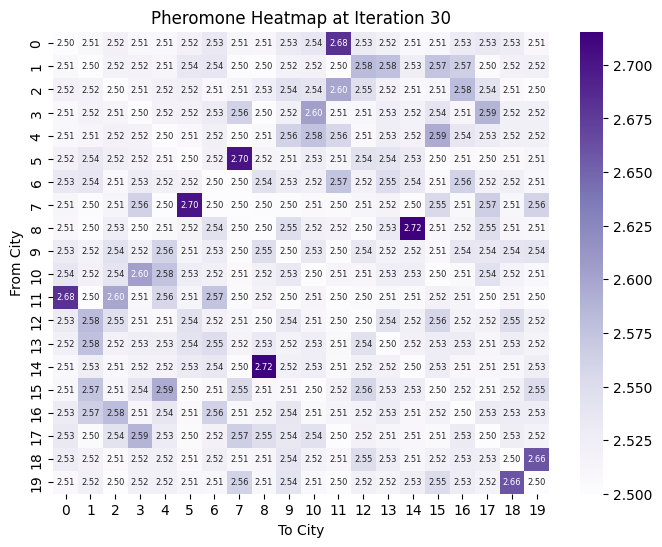

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Best Path at Iteration 30: [0, 11, 2, 16, 4, 15, 18, 19, 7, 5, 13, 1, 12, 10, 14, 8, 17, 3, 9, 6, 0]
 Total Cost: 282

 Pheromone Matrix at Iteration 40


To City,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
From City,,,,,,,,,,,,,,,,,,,,
0,2.500,2.521,2.527,2.517,2.512,2.511,2.530,2.504,2.510,2.521,2.536,2.681,2.518,2.527,2.502,2.512,2.514,2.548,2.528,2.523
1,2.521,2.500,2.515,2.506,2.516,2.509,2.557,2.517,2.501,2.514,2.522,2.503,2.620,2.550,2.518,2.560,2.566,2.515,2.508,2.526
2,2.527,2.515,2.500,2.516,2.525,2.517,2.513,2.507,2.541,2.537,2.512,2.589,2.543,2.522,2.523,2.519,2.582,2.525,2.514,2.517
3,2.517,2.506,2.516,2.500,2.515,2.516,2.514,2.585,2.513,2.514,2.597,2.512,2.519,2.524,2.514,2.516,2.529,2.586,2.516,2.535
4,2.512,2.516,2.525,2.515,2.500,2.506,2.525,2.501,2.528,2.537,2.585,2.525,2.517,2.525,2.508,2.596,2.565,2.530,2.518,2.509
5,2.511,2.509,2.517,2.516,2.506,2.500,2.513,2.691,2.512,2.528,2.539,2.515,2.554,2.542,2.534,2.508,2.503,2.525,2.507,2.514
6,2.530,2.557,2.513,2.514,2.525,2.513,2.500,2.500,2.536,2.537,2.526,2.587,2.510,2.549,2.518,2.507,2.554,2.527,2.518,2.522
7,2.504,2.517,2.507,2.585,2.501,2.691,2.500,2.500,2.515,2.506,2.501,2.504,2.508,2.520,2.515,2.554,2.503,2.559,2.505,2.547
8,2.510,2.501,2.541,2.513,2.528,2.512,2.536,2.515,2.500,2.531,2.516,2.508,2.503,2.520,2.723,2.505,2.507,2.542,2.513,2.518


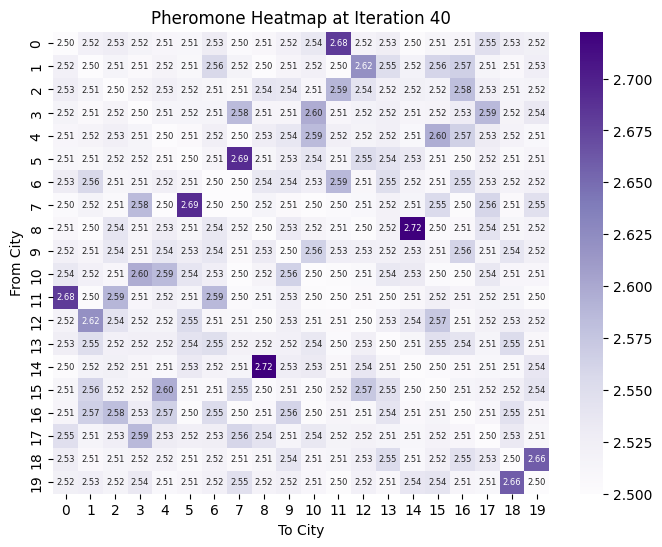

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Best Path at Iteration 40: [0, 11, 2, 16, 4, 15, 18, 19, 7, 5, 13, 1, 12, 10, 14, 8, 17, 3, 9, 6, 0]
 Total Cost: 282

 Pheromone Matrix at Iteration 50


To City,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
From City,,,,,,,,,,,,,,,,,,,,
0,2.500,2.515,2.510,2.512,2.510,2.513,2.533,2.502,2.502,2.519,2.544,2.702,2.536,2.526,2.503,2.527,2.520,2.525,2.530,2.516
1,2.515,2.500,2.515,2.507,2.516,2.520,2.548,2.505,2.506,2.508,2.526,2.507,2.622,2.551,2.533,2.562,2.565,2.514,2.508,2.517
2,2.510,2.515,2.500,2.511,2.517,2.531,2.507,2.508,2.518,2.545,2.518,2.598,2.562,2.522,2.526,2.519,2.582,2.527,2.510,2.520
3,2.512,2.507,2.511,2.500,2.518,2.535,2.521,2.586,2.506,2.522,2.552,2.510,2.523,2.532,2.514,2.521,2.525,2.621,2.511,2.523
4,2.510,2.516,2.517,2.518,2.500,2.504,2.529,2.500,2.537,2.556,2.579,2.538,2.516,2.523,2.509,2.611,2.535,2.515,2.523,2.509
5,2.513,2.520,2.531,2.535,2.504,2.500,2.520,2.692,2.515,2.516,2.508,2.511,2.543,2.551,2.538,2.501,2.515,2.518,2.504,2.513
6,2.533,2.548,2.507,2.521,2.529,2.520,2.500,2.507,2.540,2.558,2.514,2.560,2.518,2.544,2.508,2.520,2.567,2.511,2.522,2.521
7,2.502,2.505,2.508,2.586,2.500,2.692,2.507,2.500,2.507,2.510,2.514,2.502,2.507,2.504,2.505,2.560,2.511,2.528,2.505,2.593
8,2.502,2.506,2.518,2.506,2.537,2.515,2.540,2.507,2.500,2.538,2.522,2.526,2.502,2.522,2.725,2.507,2.503,2.547,2.519,2.506


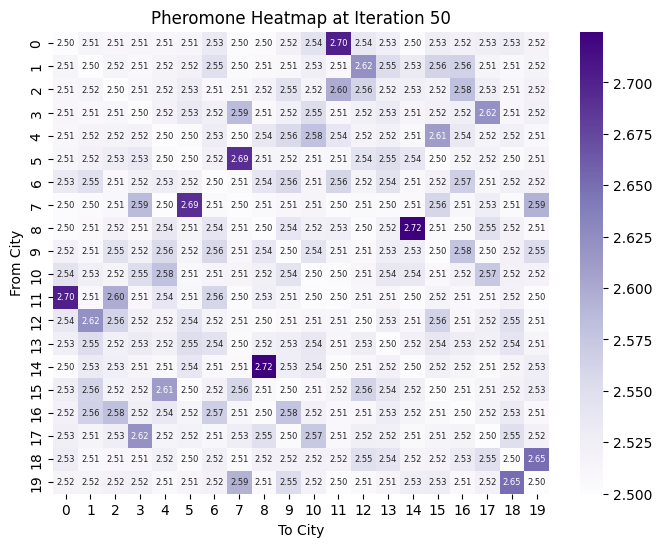

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Best Path at Iteration 50: [0, 6, 11, 2, 12, 1, 15, 4, 16, 3, 17, 8, 14, 5, 7, 19, 18, 13, 9, 10, 0]
 Total Cost: 279


In [ ]:
def run_AOC_with_snapshots(n_cities, n_ant, distances=None):
    pheromone_snapshots = {}
    best_paths_by_iteration = {}

    def callback(iteration, pheromones, best_path, best_cost):
        if iteration % 10 == 0:
            pheromone_snapshots[iteration] = pheromones.copy()
            best_paths_by_iteration[iteration] = (best_path.copy(), best_cost)

    best_path, best_cost, distances = run_AOC(n_cities, n_ant, distances, iteration_callback=callback)
    return best_path, best_cost, distances, pheromone_snapshots, best_paths_by_iteration




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def show_pheromone_table(pheromone_matrix, iteration):
    df = pd.DataFrame(pheromone_matrix)
    df.index.name = 'From City'
    df.columns.name = 'To City'
    print(f"\n Pheromone Matrix at Iteration {iteration}")
    display(df.round(3))

def plot_pheromone_heatmap(pheromone_matrix, iteration):
    filename = f"iter_{iteration}.png"

    plt.figure(figsize=(8, 6))
    sns.heatmap(pheromone_matrix, annot=True, fmt=".2f", cmap="Purples", annot_kws={"size": 6})
    plt.title(f"Pheromone Heatmap at Iteration {iteration}")
    plt.xlabel("To City")
    plt.ylabel("From City")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    files.download(filename)

def show_best_path_at_iteration(best_paths, iteration):
    path, cost = best_paths[iteration]
    path = [int(city) for city in path]  # convert all to plain int
    print(f" Best Path at Iteration {iteration}: {path}")
    print(f" Total Cost: {cost}")


# Example run for 10 cities, 5 ants:
# best_path, best_cost, distances, pheromone_snapshots, best_paths_by_iteration = run_AOC_with_snapshots(10, 20)
# best_path, best_cost, distances, pheromone_snapshots, best_paths_by_iteration = run_AOC_with_snapshots(10, 1)

best_path, best_cost, distances, pheromone_snapshots, best_paths_by_iteration = run_AOC_with_snapshots(20, 20)

#
# Display pheromone maps and best paths every 10 iterations
for iter_num in [10, 20, 30, 40, 50]:
    show_pheromone_table(pheromone_snapshots[iter_num], iter_num)
    plot_pheromone_heatmap(pheromone_snapshots[iter_num], iter_num)
    show_best_path_at_iteration(best_paths_by_iteration, iter_num)
